In [1]:
#import libraries

import tensorflow as tf   #for neural network
import pandas as pd       #for pandas, so the dataframe which is the datatype that will hole the dataset
import matplotlib.pyplot as plt #the module from the library that allows us to plot
import numpy as np        #not necessarily needed but allows for more complex list and mathamatical operations
import matplotlib         #not necessarily needed but allows for more flexiblility with plotting
import sklearn.preprocessing as skl #for preprocessing the data, really easy and intuitive
import seaborn as sns     #for simple plotyting that will not take so much space
import os                 #not used but helps with going through files
from sklearn import tree  #for creating a binary tree if needed
import graphviz           #used for creating better pictures of the binary tree
from sklearn.model_selection import train_test_split  #importing a specific function on the site used for preprocessing
from google.colab import drive  #allows me to acess my drive
from sklearn.preprocessing import OneHotEncoder
from keras.layers import Input, Dense, Dropout,GaussianNoise, Concatenate
from keras.models import Model
from keras import Sequential
from keras.utils.vis_utils import plot_model

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#establishes navigation within my drive

#drive.mount('/content/gdrive')  #this first bit puts my drive the files of this computer, to access dataset

#root_path = '/content/gdrive/My Drive/'
#dataset_path = root_path + 'Colab Notebooks/data1(1).csv/' #establishes path to my dataset)

#/content/drive/MyDrive/Colab_Notebooks/The very beginning/Dataset for Hylex paper/data.csv

In [4]:
def getcsv(filename):
  return(pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/The very beginning/Dataset for Hylex paper/"+filename, header = 0, index_col = 0))

In [5]:
raw_data = getcsv("data.csv")
raw_data.head()

,OligomericState,AminoAcidSequence,Source
Name,,,
GFP (S65A),Dimer,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,http://dx.doi.org/10.1016/S0968-0004(00)89099-4
GFP (S65C),Dimer,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,http://dx.doi.org/10.1016/S0968-0004(00)89099-4
GFP (S65L),Dimer,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,http://dx.doi.org/10.1016/S0968-0004(00)89099-4
GFP (S65T),Dimer,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,http://dx.doi.org/10.1016/S0968-0004(00)89099-4
GFP (Y66F),Dimer,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,http://dx.doi.org/10.1016/S0968-0004(00)89099-4


In [6]:
raw_data["AminoAcidSequence"] = raw_data["AminoAcidSequence"].map(lambda x: x.replace('\n','').replace('\r',''))

In [7]:
amino_acid_data = raw_data["AminoAcidSequence"]

In [ ]:
'''
for i in range(400):
  print("************************ Amino Acid Data *****************************")
  print(amino_acid_data[i])
  print()
  print()
  print(raw_data["AminoAcidSequence"][i])
  print()
  print()
'''

In [ ]:
# monomer, tetramer, dimer

monomer_amino_acid = amino_acid_data[raw_data["OligomericState"] == "Monomer"]
tetramer_amino_acid = amino_acid_data[raw_data["OligomericState"] == "Tetramer"]
dimer_amino_acid = amino_acid_data[raw_data["OligomericState"] == "Dimer"]
monomer_amino_acid.head()

In [ ]:
totalNumDataPts = len(raw_data)
print(totalNumDataPts)

In [11]:
import string

def makeFrequencyData(data):
    alphabet = (list(string.ascii_uppercase))
    df = pd.DataFrame(data.apply(lambda row : [row.count(i) for i in alphabet]).to_list(), columns = alphabet, index = data.index)
    return df

In [12]:
monomer_amino_acid_freq = makeFrequencyData(monomer_amino_acid)
tetramer_amino_acid_freq = makeFrequencyData(tetramer_amino_acid)
dimer_amino_acid_freq = makeFrequencyData(dimer_amino_acid)
monomer_amino_acid_freq.head()

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
Name,,,,,,,,,,,,,,,,,,,,,
mCitrine,8,0,0,19,16,13,23,10,12,0,...,6,7,9,14,0,18,1,0,12,0
aceGFP (N19D/K101E/V11I/E222G),10,0,2,18,15,14,22,9,15,0,...,7,6,11,18,0,13,1,0,12,0
mAG,11,0,4,16,13,11,18,6,11,0,...,7,10,7,15,0,13,2,0,14,0
mRaspberry,10,0,1,13,23,9,25,5,8,0,...,7,9,12,13,0,15,3,0,11,0
mEosFP (Before and After Photoconversion),12,0,3,17,14,14,21,18,11,0,...,4,10,8,12,0,12,2,0,11,0


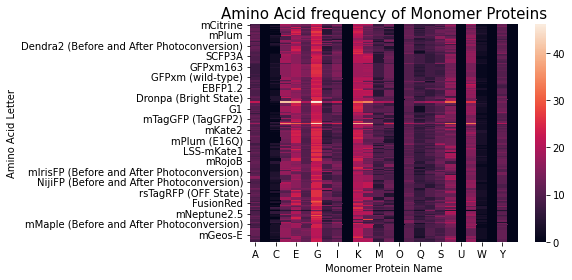

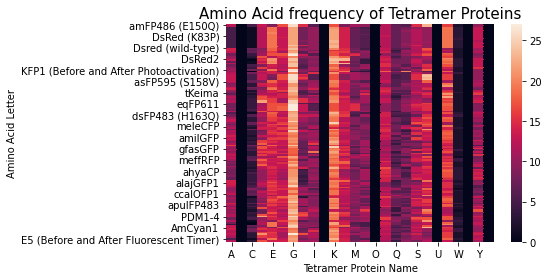

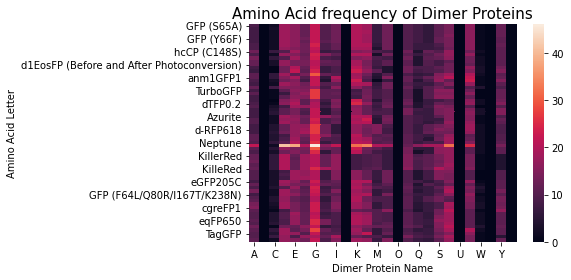

In [13]:
ax = sns.heatmap(monomer_amino_acid_freq)
plt.title('Amino Acid frequency of Monomer Proteins', fontsize = 15)
plt.xlabel('Monomer Protein Name', fontsize = 10)
plt.ylabel('Amino Acid Letter', fontsize = 10)
plt.show()

sns.heatmap(tetramer_amino_acid_freq)
plt.title('Amino Acid frequency of Tetramer Proteins', fontsize = 15)
plt.xlabel('Tetramer Protein Name', fontsize = 10)
plt.ylabel('Amino Acid Letter', fontsize = 10)
plt.show()

sns.heatmap(dimer_amino_acid_freq)
plt.title('Amino Acid frequency of Dimer Proteins', fontsize = 15)
plt.xlabel('Dimer Protein Name', fontsize = 10)
plt.ylabel('Amino Acid Letter', fontsize = 10)
plt.show()



In [14]:
print(len(monomer_amino_acid_freq))
print(len(tetramer_amino_acid_freq))
print(len(dimer_amino_acid_freq))

207
135
67


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


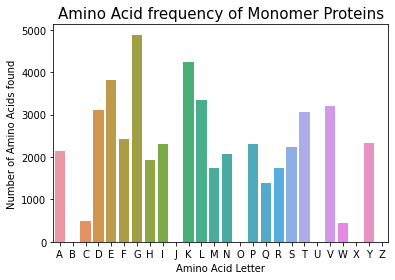

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


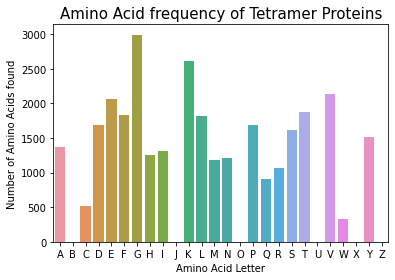

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


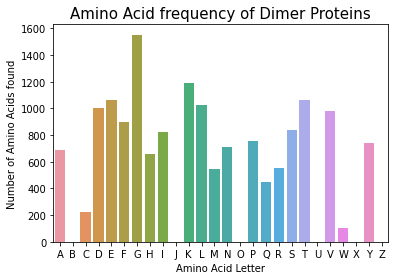

In [15]:
sns.barplot(monomer_amino_acid_freq.columns,monomer_amino_acid_freq.sum())
plt.title('Amino Acid frequency of Monomer Proteins', fontsize = 15)
plt.xlabel('Amino Acid Letter', fontsize = 10)
plt.ylabel('Number of Amino Acids found', fontsize = 10)
plt.show()

sns.barplot(tetramer_amino_acid_freq.columns,tetramer_amino_acid_freq.sum())
plt.title('Amino Acid frequency of Tetramer Proteins', fontsize = 15)
plt.xlabel('Amino Acid Letter', fontsize = 10)
plt.ylabel('Number of Amino Acids found', fontsize = 10)
plt.show()

sns.barplot(dimer_amino_acid_freq.columns,dimer_amino_acid_freq.sum())
plt.title('Amino Acid frequency of Dimer Proteins', fontsize = 15)
plt.xlabel('Amino Acid Letter', fontsize = 10)
plt.ylabel('Number of Amino Acids found', fontsize = 10)
plt.show()

In [16]:
print(monomer_amino_acid_freq.sum(axis = 1).max())
print(tetramer_amino_acid_freq.sum(axis = 1).max())
print(dimer_amino_acid_freq.sum(axis = 1).max())

maxLength = makeFrequencyData(amino_acid_data).sum(axis = 1).max()
print(maxLength)

466
260
451
466


In [17]:
List = [[amino_acid_data[row][pos] if pos < len(amino_acid_data[row]) else '0' for pos in range(maxLength)] for row in range(totalNumDataPts)]
split_df = pd.DataFrame(List, index = amino_acid_data.index, columns = range(maxLength))
split_df.head()

,0,1,2,3,4,5,6,7,8,9,...,456,457,458,459,460,461,462,463,464,465
Name,,,,,,,,,,,,,,,,,,,,,
GFP (S65A),M,S,K,G,E,E,L,F,T,G,...,0,0,0,0,0,0,0,0,0,0
GFP (S65C),M,S,K,G,E,E,L,F,T,G,...,0,0,0,0,0,0,0,0,0,0
GFP (S65L),M,S,K,G,E,E,L,F,T,G,...,0,0,0,0,0,0,0,0,0,0
GFP (S65T),M,S,K,G,E,E,L,F,T,G,...,0,0,0,0,0,0,0,0,0,0
GFP (Y66F),M,S,K,G,E,E,L,F,T,G,...,0,0,0,0,0,0,0,0,0,0


In [18]:
one_hot_ecode = pd.get_dummies(split_df)
one_hot_ecode.head()

,0_A,0_D,0_E,0_G,0_H,0_I,0_K,0_L,0_M,0_N,...,461_0,461_D,462_0,462_E,463_0,463_L,464_0,464_Y,465_0,465_K
Name,,,,,,,,,,,,,,,,,,,,,
GFP (S65A),0,0,0,0,0,0,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0
GFP (S65C),0,0,0,0,0,0,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0
GFP (S65L),0,0,0,0,0,0,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0
GFP (S65T),0,0,0,0,0,0,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0
GFP (Y66F),0,0,0,0,0,0,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0


In [19]:
print(one_hot_ecode.columns)
print()

Index(['0_A', '0_D', '0_E', '0_G', '0_H', '0_I', '0_K', '0_L', '0_M', '0_N',
       ...
       '461_0', '461_D', '462_0', '462_E', '463_0', '463_L', '464_0', '464_Y',
       '465_0', '465_K'],
      dtype='object', length=5273)



In [20]:
numOneHotEncodeCol = len(one_hot_ecode.columns)
print(numOneHotEncodeCol)

5273


In [21]:
train_dataset, test_dataset = train_test_split(one_hot_ecode, test_size=0.33, random_state=42)
print(train_dataset.shape)
print(test_dataset.shape)
print(type(test_dataset))
print(test_dataset.shape)

(274, 5273)
(135, 5273)
<class 'pandas.core.frame.DataFrame'>
(135, 5273)


In [22]:
'''
@tf.function
def custom_activation(x):
  if x > 0:
    return( tf.ones(tf.shape(x)) + tf.math.scalar_mul(0.01,x) )
  return tf.zeros(tf.shape(x)) - tf.math.scalar_mul(0.01,x)
'''

'\n@tf.function\ndef custom_activation(x):\n  if x > 0:\n    return( tf.ones(tf.shape(x)) + tf.math.scalar_mul(0.01,x) )\n  return tf.zeros(tf.shape(x)) - tf.math.scalar_mul(0.01,x)\n'

In [23]:
# this is the size of our encoded representations
encoding_dim = 32

# this is our input placeholder
raw_input = Input(shape=(numOneHotEncodeCol,), name = "Encoder_Input")
main_input = Input(shape=(numOneHotEncodeCol,), name = "Autoencoder_Input")

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,), name = "Decoder_Input")

# "encoded" is the encoded representation of the input
encoded1 = Dense(1024, activation='relu', name = "Encoder_Layer_1")(raw_input)
encoded2 = Dense(512, activation='relu', name = "Encoder_Layer_2")(encoded1)
encoded3 = GaussianNoise(0.2, name = "Encoder_Gaussian_Noise_Layer")(encoded2)
encoded4 = Dense(128, activation='relu', name = "Encoder_Layer_3")(encoded3)
encoded = Dense(encoding_dim, activation='sigmoid', name = "Encoder_Output_Layer")(encoded4)

# "decoded" is the lossy reconstruction of the input
decoded1 = Dense(128, activation='relu', name = "Decoder_Layer_1")(encoded_input)
decoded2 = GaussianNoise(0.2, name = "Decoder_Gaussian_Noise_Layer")(decoded1)
decoded3 = Dense(1024, activation='relu', name = "Decoder_Layer_2")(decoded2)
decoded = Dense(numOneHotEncodeCol, activation='relu', name = "Decoder_Output_Layer")(decoded3)


# this model maps an input to its encoded representation
encoder = Model(raw_input,encoded, name = "Encoder")
encoder_ = encoder(main_input)

encoder.summary()

# create the decoder model
decoder = Model(encoded_input,decoded, name = "Decoder")
decoder_ = decoder(encoder_)

decoder.summary()

# this model maps an input to its reconstruction
autoencoder = Model(main_input, decoder_, name = "Autoencoder")

autoencoder.summary()

autoencoder.compile(loss=tf.keras.losses.Hinge(), optimizer='Adam', metrics=[tf.keras.metrics.TopKCategoricalAccuracy(k=466)])

history = autoencoder.fit(train_dataset, train_dataset,
                epochs=50,
                batch_size=20,
                shuffle=True,
                validation_data=(test_dataset, test_dataset))



Model: "Encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder_Input (InputLayer)  [(None, 5273)]            0         
                                                                 
 Encoder_Layer_1 (Dense)     (None, 1024)              5400576   
                                                                 
 Encoder_Layer_2 (Dense)     (None, 512)               524800    
                                                                 
 Encoder_Gaussian_Noise_Laye  (None, 512)              0         
 r (GaussianNoise)                                               
                                                                 
 Encoder_Layer_3 (Dense)     (None, 128)               65664     
                                                                 
 Encoder_Output_Layer (Dense  (None, 32)               4128      
 )                                                         

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


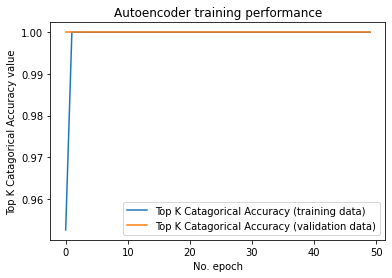

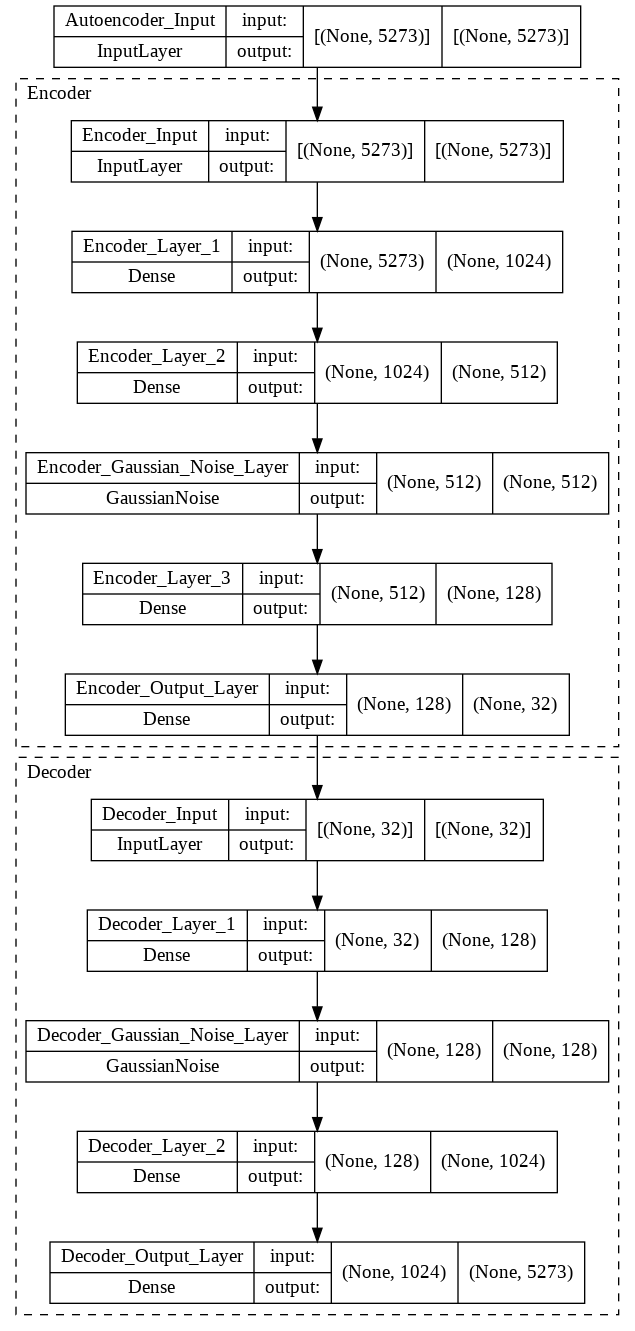

In [24]:
# Plot history: Top K Catagorical Accuracy
plt.plot(history.history['top_k_categorical_accuracy'], label='Top K Catagorical Accuracy (training data)')
plt.plot(history.history['val_top_k_categorical_accuracy'], label='Top K Catagorical Accuracy (validation data)')
plt.title('Autoencoder training performance')
plt.ylabel('Top K Catagorical Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="bottom right")
plt.show()

plot_model(autoencoder, show_shapes = True, expand_nested = True)

In [25]:
'''
#encoder:
input1=tf.keras.Input(shape=784)
x=tf.keras.layers.Dense(100,activation='relu')(input1) 
latent=tf.keras.layers.Dense(10,activation='linear')(x)
encoder=tf.keras.Model(input1,latent) 

#decoder
latent_input=tf.keras.Input(shape=10) 
y=tf.keras.layers.Dense(100,activation='relu')(latent_input)
output=tf.keras.layers.Dense(784,activation='relu')(y) 
decoder=tf.keras.Model(latent_input,output) 

###Define autoencoder
main_input=tf.keras.Input(shape=784)
encoder_=encoder(main_input)
decoder_=decoder(encoder_) 

autoencoder=tf.keras.Model(main_input,decoder_) 

encoder.summary()
decoder.summary()
autoencoder.summary()
'''

"\n#encoder:\ninput1=tf.keras.Input(shape=784)\nx=tf.keras.layers.Dense(100,activation='relu')(input1) \nlatent=tf.keras.layers.Dense(10,activation='linear')(x)\nencoder=tf.keras.Model(input1,latent) \n\n#decoder\nlatent_input=tf.keras.Input(shape=10) \ny=tf.keras.layers.Dense(100,activation='relu')(latent_input)\noutput=tf.keras.layers.Dense(784,activation='relu')(y) \ndecoder=tf.keras.Model(latent_input,output) \n\n###Define autoencoder\nmain_input=tf.keras.Input(shape=784)\nencoder_=encoder(main_input)\ndecoder_=decoder(encoder_) \n\nautoencoder=tf.keras.Model(main_input,decoder_) \n\nencoder.summary()\ndecoder.summary()\nautoencoder.summary()\n"

In [26]:
tester = np.array([ [int(a == b) for a in range(encoding_dim)] for b in range(encoding_dim) ])

print(tester)
print(len(tester[0]))

important_parts = decoder.predict(tester)

print(type(important_parts))
print(important_parts.shape)
print(len(important_parts[2]))

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
32
<class 'numpy.ndarray'>
(32, 5273)
5273


In [27]:
important_parts_df = pd.DataFrame(important_parts, columns = one_hot_ecode.columns)

important_parts_df.head()

,0_A,0_D,0_E,0_G,0_H,0_I,0_K,0_L,0_M,0_N,...,461_0,461_D,462_0,462_E,463_0,463_L,464_0,464_Y,465_0,465_K
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.024547,0.0,...,0.411611,0.0,0.396657,0.009003,0.402622,0.0,0.428926,0.0,0.372873,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.974551,0.0,...,0.335006,0.0,0.323249,0.014784,0.356924,0.0,0.344242,0.0,0.322122,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.235609,0.0,...,0.343020,0.0,0.368304,0.053489,0.381256,0.0,0.354586,0.0,0.338716,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.170040,0.0,...,0.367179,0.0,0.374894,0.041871,0.380540,0.0,0.398322,0.0,0.351892,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.050130,0.0,...,0.359647,0.0,0.400315,0.024073,0.383831,0.0,0.367374,0.0,0.368866,0.0


In [28]:
'''
for sample in important_parts[0:5]:
  sns.distplot(sample)
  plt.show()
'''

'\nfor sample in important_parts[0:5]:\n  sns.distplot(sample)\n  plt.show()\n'

In [29]:
active = important_parts_df > 0.1
active.head()

,0_A,0_D,0_E,0_G,0_H,0_I,0_K,0_L,0_M,0_N,...,461_0,461_D,462_0,462_E,463_0,463_L,464_0,464_Y,465_0,465_K
0,False,False,False,False,False,False,False,False,True,False,...,True,False,True,False,True,False,True,False,True,False
1,False,False,False,False,False,False,False,False,True,False,...,True,False,True,False,True,False,True,False,True,False
2,False,False,False,False,False,False,False,False,True,False,...,True,False,True,False,True,False,True,False,True,False
3,False,False,False,False,False,False,False,False,True,False,...,True,False,True,False,True,False,True,False,True,False
4,False,False,False,False,False,False,False,False,True,False,...,True,False,True,False,True,False,True,False,True,False


In [30]:
print([i for i in active.columns if i.startswith("81")])

['81_A', '81_C', '81_D', '81_E', '81_F', '81_G', '81_H', '81_I', '81_K', '81_L', '81_M', '81_N', '81_P', '81_Q', '81_R', '81_S', '81_T', '81_V', '81_Y']


In [31]:
active = np.array(active)
for row in active:
  print(important_parts_df.columns[row])

Index(['0_M', '3_S', '6_H', '7_H', '10_G', '12_A', '51_R', '54_G', '55_R',
       '67_D', '79_I', '89_Q', '91_A', '99_P', '105_V', '106_L', '126_K',
       '158_V', '168_V', '193_D', '206_T', '210_L', '213_P', '215_P', '221_L',
       '233_D', '248_G', '257_F', '286_D', '307_T', '321_F', '325_G', '355_N',
       '360_D', '419_T', '427_I', '440_Y', '441_E', '451_0', '452_0', '453_0',
       '454_0', '455_0', '456_0', '457_0', '458_0', '459_0', '460_0', '461_0',
       '462_0', '463_0', '464_0', '465_0'],
      dtype='object')
Index(['0_M', '3_S', '6_H', '7_H', '10_G', '12_A', '51_R', '54_G', '55_R',
       '67_D', '79_I', '89_Q', '91_A', '99_P', '105_V', '106_L', '126_K',
       '158_V', '168_V', '193_D', '210_L', '213_P', '215_P', '221_L', '233_D',
       '248_G', '257_F', '286_D', '307_T', '321_F', '325_G', '355_N', '360_D',
       '419_T', '427_I', '440_Y', '441_E', '451_0', '452_0', '453_0', '454_0',
       '455_0', '456_0', '457_0', '458_0', '459_0', '460_0', '461_0', '462_0',
    

In [32]:
sample = one_hot_ecode
answer = pd.DataFrame(autoencoder.predict(sample), columns= sample.columns)

sample_np = np.array(sample)
answer_np = np.array(pd.DataFrame(answer))

print(sample)
print(answer)

                                                    0_A  0_D  0_E  0_G  0_H  \
Name                                                                          
GFP (S65A)                                            0    0    0    0    0   
GFP (S65C)                                            0    0    0    0    0   
GFP (S65L)                                            0    0    0    0    0   
GFP (S65T)                                            0    0    0    0    0   
GFP (Y66F)                                            0    0    0    0    0   
...                                                 ...  ...  ...  ...  ...   
pcDronpa (Before and After Photoconversion)           0    0    0    0    0   
pcDronpa2 (Before and After Photoconversion)          0    0    0    0    0   
pcDronpa (A69T)                                       0    0    0    0    0   
E5 (Before and After Fluorescent Timer)               0    0    0    0    0   
EosFP Wild-type (Before and After Photoconversion)  

In [33]:
def reverse_one_hot_encode(x):
  col = list(one_hot_ecode.columns)
  ans = [col[i][-1] for i in range(len(col)) if x[i]]
  return(''.join(ans))

In [ ]:
x = np.array(one_hot_ecode)
y = list(amino_acid_data)

for i in range(10):
  a = x[i]
  b = reverse_one_hot_encode(a)
  print(b)
  print(y[i])

In [ ]:
for i in range(5):
  print("Number",i)
  o = reverse_one_hot_encode(sample_np[i])
  a = reverse_one_hot_encode(answer_np[i])
  print("Original")
  print(o)
  print("Made")
  print(a)
  print()

In [ ]:
print(important_parts)

In [ ]:
list(important_parts_df.index)

In [ ]:
hopefullyGood = reverse_one_hot_encode(important_parts[0])
print(hopefullyGood)

In [ ]:
'''
for i in range(466):
  ind = [j for j in one_hot_ecode.columns if j.startswith(str(i)+'_')]
  y = one_hot_ecode[ind].sum()
  print(i)
  sns.barplot(ind,y)
  plt.show()
'''

In [40]:
model8 = Sequential()
model8.add(Dense(256, input_shape=(one_hot_ecode.shape[1],), name="Layer_1"))
model8.add(Dense(256, name="Layer_2"))
model8.add(GaussianNoise(0.1, name="Layer_3"))
model8.add(Dense(256, name="Layer_4"))
model8.add(Dense(2, name="Output_Layer"))

X = one_hot_ecode
Y = pd.get_dummies(raw_data["OligomericState"] == 'Monomer')

model8.summary()

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=42)

model8.compile(loss=tf.keras.losses.Hinge(), optimizer='Adam', metrics=[tf.keras.metrics.TopKCategoricalAccuracy(k=1)])
history = model8.fit(x_train, y_train, epochs=500, batch_size=10, shuffle=True, validation_data=(x_test, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Dense)             (None, 256)               1350144   
                                                                 
 Layer_2 (Dense)             (None, 256)               65792     
                                                                 
 Layer_3 (GaussianNoise)     (None, 256)               0         
                                                                 
 Layer_4 (Dense)             (None, 256)               65792     
                                                                 
 Output_Layer (Dense)        (None, 2)                 514       
                                                                 
Total params: 1,482,242
Trainable params: 1,482,242
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
28/28 [===========================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


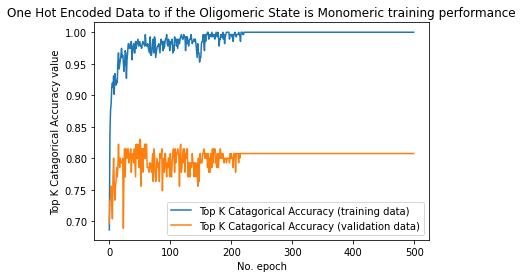

In [41]:
# Plot history: Top K Catagorical Accuracy
plt.plot(history.history['top_k_categorical_accuracy'], label='Top K Catagorical Accuracy (training data)')
plt.plot(history.history['val_top_k_categorical_accuracy'], label='Top K Catagorical Accuracy (validation data)')
plt.title('One Hot Encoded Data to if the Oligomeric State is Monomeric training performance')
plt.ylabel('Top K Catagorical Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="bottom right")
plt.show()

In [42]:
model2 = Sequential()
model2.add(Dense(256, input_shape=(one_hot_ecode.shape[1],), name = "Layer_1"))
model2.add(Dense(256, name = "Layer_2"))
model2.add(GaussianNoise(0.1, name = "Layer_3"))
model2.add(Dense(256, name = "Layer_4"))
model2.add(Dense(3, name = "Output"))

X = one_hot_ecode
Y = pd.get_dummies(raw_data["OligomericState"])

model2.summary()

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=42)

model2.compile(loss=tf.keras.losses.Hinge(), optimizer='Adam', metrics=[tf.keras.metrics.TopKCategoricalAccuracy(k=1)])
history = model2.fit(x_train, y_train, epochs=500, batch_size=10, shuffle=True, validation_data=(x_test, y_test))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Dense)             (None, 256)               1350144   
                                                                 
 Layer_2 (Dense)             (None, 256)               65792     
                                                                 
 Layer_3 (GaussianNoise)     (None, 256)               0         
                                                                 
 Layer_4 (Dense)             (None, 256)               65792     
                                                                 
 Output (Dense)              (None, 3)                 771       
                                                                 
Total params: 1,482,499
Trainable params: 1,482,499
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
28/28 [=========================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


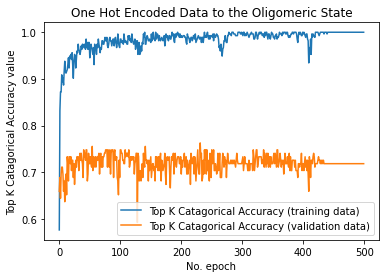

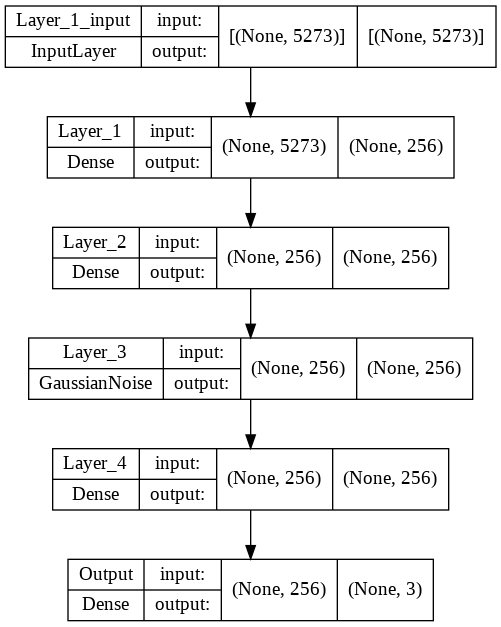

In [43]:
# Plot history: Top K Catagorical Accuracy
plt.plot(history.history['top_k_categorical_accuracy'], label='Top K Catagorical Accuracy (training data)')
plt.plot(history.history['val_top_k_categorical_accuracy'], label='Top K Catagorical Accuracy (validation data)')
plt.title('One Hot Encoded Data to the Oligomeric State')
plt.ylabel('Top K Catagorical Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="bottom right")
plt.show()


plot_model(model2, show_shapes = True, expand_nested = False)

In [ ]:
model3_1 = Dense(32, activation='sigmoid', name = "Layer_1")(encoded_input)
model3_2 = Dense(256, activation='sigmoid', name = "Layer_2")(model3_1)
model3_3 = GaussianNoise(0.1, name = "Layer_3")(model3_2)
model3_4 = Dense(256, activation='sigmoid', name = "Layer_4")(model3_3)
model3_5 = Dense(3, activation='sigmoid', name = "Output_Layer")(model3_4)


secondary3_NN = Model(encoded_input,model3_5)
secondary3_NN_ = secondary3_NN(encoder_)

main3_NN = Model(main_input, secondary3_NN_)

main3_NN.summary()

X = one_hot_ecode
Y = pd.get_dummies(raw_data["OligomericState"])

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=42)

main3_NN.compile(loss=tf.keras.losses.Hinge(), optimizer='Adam', metrics=[tf.keras.metrics.TopKCategoricalAccuracy(k=1)])

history = main3_NN.fit(x_train, y_train, epochs=500, batch_size=10, shuffle=True, validation_data=(x_test, y_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


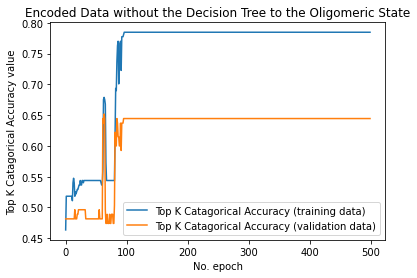

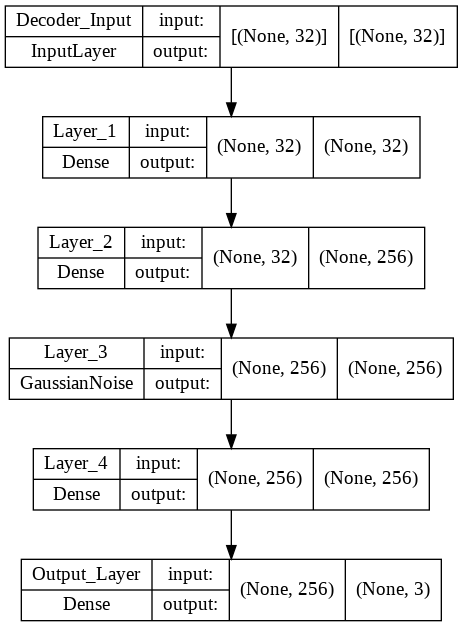

In [45]:
# Plot history: Top K Catagorical Accuracy
plt.plot(history.history['top_k_categorical_accuracy'], label='Top K Catagorical Accuracy (training data)')
plt.plot(history.history['val_top_k_categorical_accuracy'], label='Top K Catagorical Accuracy (validation data)')
plt.title('Encoded Data without the Decision Tree to the Oligomeric State')
plt.ylabel('Top K Catagorical Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="bottom right")
plt.show()


#secondary3_NN.name = "To Oligomeric State"
plot_model(secondary3_NN, show_shapes = True, expand_nested = False)

In [ ]:
#Encoded Data without the Decision Tree to if the Oligomeric State is Monomeric
'''
model4_1 = Dense(32, activation='sigmoid')(encoded_input)
model4_2 = Dense(256, activation='sigmoid')(model4_1)
model4_3 = GaussianNoise(0.1)(model4_2)
model4_4 = Dense(256, activation='sigmoid')(model4_3)
model4_5 = Dense(2, activation='sigmoid')(model4_4)


secondary4_NN = Model(encoded_input,model4_5)
secondary4_NN_ = secondary4_NN(encoder_)

main4_NN = Model(main_input, secondary4_NN_)

main4_NN.summary()

X = one_hot_ecode
Y = pd.get_dummies(raw_data["OligomericState"] == 'Monomer')

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=42)

main4_NN.compile(loss=tf.keras.losses.Hinge(), optimizer='Adam', metrics=[tf.keras.metrics.TopKCategoricalAccuracy(k=1)])

main4_NN.fit(x_train, y_train, epochs=50, batch_size=10, shuffle=True, validation_data=(x_test, y_test))
'''


In [ ]:
#NOT CONTROL NN

'''
model5_1 = Dense(32, activation='sigmoid')(encoded_input)
model5_2 = Dense(256, activation='sigmoid')(model5_1)
model5_3 = GaussianNoise(0.1)(model5_2)
model5_4 = Dense(256, activation='sigmoid')(model5_3)
model5_5 = Dense(3, activation='sigmoid')(model5_4)


secondary5_NN = Model(encoded_input,model5_5)
secondary5_NN_ = secondary5_NN(encoder_)

main5_NN = Model(main_input, secondary5_NN_)

main5_NN.summary()

X = one_hot_ecode
Y = pd.get_dummies(raw_data["OligomericState"])

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=42)

main5_NN.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='Adam', metrics=['categorical_crossentropy'])

main5_NN.fit(x_train, y_train, epochs=50, batch_size=10, shuffle=True, validation_data=(x_test, y_test))
'''

In [48]:
X, Y = one_hot_ecode, raw_data["OligomericState"]
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=42)
clf = tree.DecisionTreeClassifier(max_leaf_nodes = 8, min_samples_leaf = 15) #You are using CART not J48, but they are similar
clf = clf.fit(x_train, y_train)

In [49]:
tree_test_predict = clf.predict(x_test)
correct = (tree_test_predict == y_test)
print(np.sum(correct)/len(correct))

tree_test_predict = clf.predict(x_train)
correct = (tree_test_predict == y_train)
print(np.sum(correct)/len(correct))

0.6222222222222222
0.7591240875912408


In [ ]:
ecoded_amino_acid_sequence_nparray = encoder.predict(one_hot_ecode)
ecoded_amino_acid_sequence = pd.DataFrame(ecoded_amino_acid_sequence_nparray)


print(type(ecoded_amino_acid_sequence_nparray))
print(ecoded_amino_acid_sequence_nparray)
print(len(ecoded_amino_acid_sequence_nparray))
print(len(ecoded_amino_acid_sequence_nparray[0]))
print(ecoded_amino_acid_sequence.index)


In [ ]:
tree_output = clf.apply(one_hot_ecode)
print(tree_output)
print(len(tree_output))

tree_encoded = pd.get_dummies(tree_output)
print(tree_encoded)
print(tree_encoded.index)

In [52]:
model6_x_data = pd.merge(ecoded_amino_acid_sequence, tree_encoded, left_index=True, right_index=True)
print(model6_x_data.shape)

(409, 40)


In [ ]:
model6_input = Input(shape=(encoding_dim+8,))

model6_1 = Dense(32, activation='sigmoid')(model6_input)
model6_2 = Dense(256, activation='sigmoid')(model6_1)
model6_3 = GaussianNoise(0.2)(model6_2)
model6_4 = Dense(256, activation='sigmoid')(model6_3)
model6_5 = Dense(3, activation='sigmoid')(model6_4)


main6_NN = Model(model6_input,model6_5)

main6_NN.summary()

X = model6_x_data
Y = pd.get_dummies(raw_data["OligomericState"])

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=42)

main6_NN.compile(loss=tf.keras.losses.Hinge(), optimizer='Adam', metrics=[tf.keras.metrics.TopKCategoricalAccuracy(k=1)])

main6_NN.fit(x_train, y_train, epochs=500, batch_size=10, validation_data=(x_test, y_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


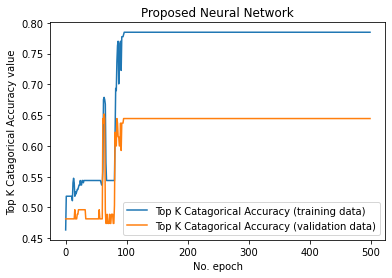

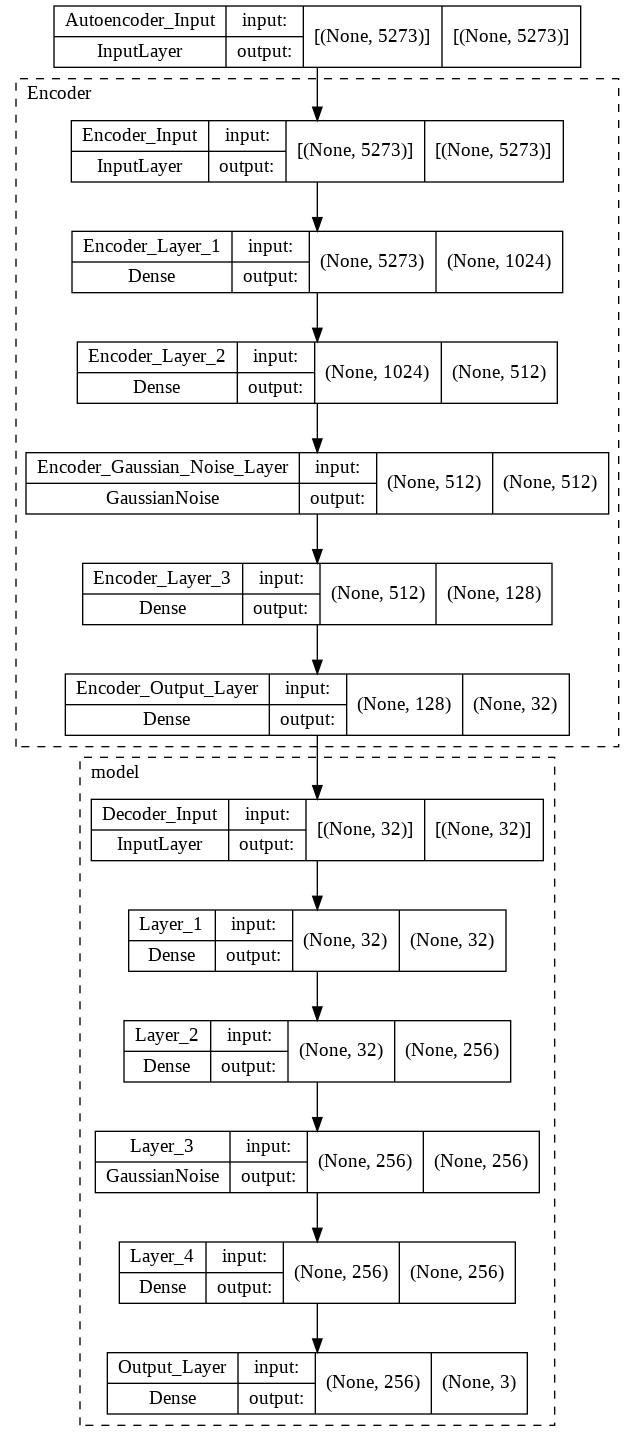

In [54]:
# Plot history: Top K Catagorical Accuracy
plt.plot(history.history['top_k_categorical_accuracy'], label='Top K Catagorical Accuracy (training data)')
plt.plot(history.history['val_top_k_categorical_accuracy'], label='Top K Catagorical Accuracy (validation data)')
plt.title('Proposed Neural Network')
plt.ylabel('Top K Catagorical Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="bottom right")
plt.show()


plot_model(main3_NN, show_shapes = True, expand_nested = True)

In [ ]:
print(x_test.shape)
print(x_train.shape)

In [ ]:
'''
1. Take test data
2. From each output check to see how much the inputs change from a small deviation
'''

state_outputs = main6_NN.predict(x_test)
state_outputs_df = pd.DataFrame(state_outputs, columns=y_test.columns,index=y_test.index)
diff_df = y_test.subtract(state_outputs_df).abs().sum(axis = 1)
cor = diff_df < 1
wrog = diff_df > 1
num_cor = cor.sum(axis=0)
num_wrog = wrog.sum(axis=0)
print(num_wrog,num_cor)
print(cor)

In [ ]:
state_outputs = main6_NN.predict(x_train)
state_outputs_df = pd.DataFrame(state_outputs, columns=y_train.columns,index=y_train.index)
diff_df = y_train.subtract(state_outputs_df).abs().sum(axis = 1)
cor = diff_df < 1
wrog = diff_df > 1
num_cor = cor.sum(axis=0)
num_wrog = wrog.sum(axis=0)
print(num_wrog,num_cor)
print(cor)

In [ ]:
'''
model9_input = Input(shape=(encoding_dim+8,))

model9_1 = Dense(32, activation='sigmoid')(model9_input)
model9_2 = Dense(256, activation='sigmoid')(model9_1)
model9_3 = GaussianNoise(0.2)(model9_2)
model9_4 = Dense(256, activation='sigmoid')(model9_3)
model9_5 = Dense(2, activation='sigmoid')(model9_4)


main9_NN = Model(model9_input,model9_5)

main9_NN.summary()

X = model6_x_data
Y = pd.get_dummies(raw_data["OligomericState"] == 'Monomer')

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=42)

main9_NN.compile(loss=tf.keras.losses.Hinge(), optimizer='Adam', metrics=[tf.keras.metrics.TopKCategoricalAccuracy(k=1)])

history = main9_NN.fit(x_train, y_train, epochs=500, batch_size=10, validation_data=(x_test, y_test))
'''

In [ ]:
'''
# Plot history: Top K Catagorical Accuracy
plt.plot(history.history['top_k_categorical_accuracy'], label='Top K Catagorical Accuracy (training data)')
plt.plot(history.history['val_top_k_categorical_accuracy'], label='Top K Catagorical Accuracy (validation data)')
plt.title('Encoded Data with the Decision Tree to if the Oligomeric State is Monomeric')
plt.ylabel('Top K Catagorical Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="bottom right")
plt.show()


plot_model(main9_NN, show_shapes = True, expand_nested = True)
'''